# Lots of stuff, all added up in a massive notebook

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
%matplotlib inline

In [74]:
import matplotlib.pyplot as plt
import math
import graphviz
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_string_dtype
import numpy as np
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import metrics
import seaborn as sns
import scipy
from scipy.cluster import hierarchy as hc
from pdpbox import pdp
from xgboost import XGBRegressor

In [315]:
df_raw = pd.read_csv('data/train.csv', low_memory=False)
print(df_raw.shape)

(1460, 81)


### About data

80 columns + dependent variable

- SalePrice - dependent variable
- YrSold - year of sale
- LotArea - lot square footage
- BedroomAbvGr - number of bedrooms

In [316]:
with pd.option_context('display.max_rows', 10, 'display.max_columns', 10):
    display(df_raw)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,...,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,...,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,...,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,...,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,...,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,...,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,...,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,...,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,...,4,2010,WD,Normal,142125


### Looking at numeric data

In [317]:
display(df_raw.describe(include=np.number).T)

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Looking categorical data

In [318]:
display(df_raw.describe(include=np.object).T)
categorical_df = df_raw.select_dtypes(include=np.object).copy()

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [9]:
# Transform categorical data into numerical data
# Inspired from fastai
def make_cats(df):
    for n, c in df.items():
        if is_string_dtype(c):
            df[n] = c.astype('category').cat.as_ordered()
            df[n] = df[n].cat.codes + 1

### Handle numeric data

In [62]:
# select only numeric types and drop rows containing nan
# numeric_df = df_raw.select_dtypes(include=np.number).dropna()

In [8]:
# If a column has missing values, replace them with the median and add another column 'missing'
# Inspired from fastai
def fix_numeric(df):
    for n in df:
        col = df[n]
        if is_numeric_dtype(col) and any(pd.isnull(col)):
            df[n + '_nan'] = pd.isnull(col) * 1
            filler = col.median()
            df[n] = col.fillna(filler)

### Transform and save data
- remove the Id column since it is useless
- transform data

In [321]:
df_raw.drop('Id', axis='columns', inplace=True)
make_cats(df_raw)
fix_numeric(df_raw)
df_raw.to_feather('df_raw.feather')

In [322]:
df_raw = pd.read_feather('df_raw.feather')

### Split data
Create training and validation set.

In [7]:
def split_vals(df, n):
    return df[:n].copy(), df[n:].copy()

In [324]:
X_df = df_raw.drop('SalePrice', axis='columns')
Y_df = df_raw.SalePrice

train_len = 1200
X_train, X_valid = split_vals(X_df, train_len)
Y_train, Y_valid = split_vals(Y_df, train_len)

# default starting index will be 1200
X_valid = X_valid.reset_index(drop=True)
Y_valid = Y_valid.reset_index(drop=True)

### Try base model

The score used by the random forest is R^2. This compares your model with the simples one (always predicting the mean).

`R^2 = 1 - mse(model) / mse(mean)`

The better the model, the closer is R^2 to 1.

In [110]:
def rmsle(x,y): return math.sqrt(((np.log(x)-np.log(y))**2).mean())

def print_score(m):
    res = dict(
        rmsle_train=rmsle(m.predict(X_train), Y_train),
        rmsle_valid=rmsle(m.predict(X_valid), Y_valid),
        score_train=m.score(X_train, Y_train),
        score_valid=m.score(X_valid, Y_valid))
    if hasattr(m, 'oob_score_'):
        res['oob'] = m.oob_score_
    display(res)

In [332]:
rf = RandomForestRegressor(n_jobs=-1)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 132 ms


{'rmsle_train': 0.06771638898775022,
 'rmsle_valid': 0.1574469721734594,
 'score_train': 0.9745309772436912,
 'score_valid': 0.8109670483332522}

### Drawing a tree

It tries every split for every variable, and chooses the one whose prediction would result in the smallest MSE.

In [333]:
single_tree = RandomForestRegressor(n_estimators=1, max_depth=3, n_jobs=-1, bootstrap=False)
single_tree.fit(X_train, Y_train)

s = export_graphviz(single_tree.estimators_[0], feature_names=X_train.columns, out_file='tree.dot', filled=True, precision=True)
path = 'tree.dot'
s = graphviz.Source.from_file(path)
s.view()

'tree.dot.pdf'

### Bagging

- bootstraping - random sampling with replacement
- bagging
    - create multiple trees, each having access to a random subset of the data (obtained using bagging)
    - different trees are trained using different samples (and then validated using different samples in case of OOB score)

In [334]:
# take the mean of the trees
preds = np.stack([t.predict(X_valid) for t in rf.estimators_])
display(dict(preds=preds[:,0], mean=np.mean(preds[:,0]), actual=Y_valid[0]))

{'preds': array([123000., 108000., 108000., 115000., 110000., 110000., 109500.,
        118500., 109900.,  94750.]), 'mean': 110665.0, 'actual': 116050}

Adding more trees isn't necessarily an improvement

Wall time: 246 ms


{'rmsle_train': 0.06362014277321328,
 'rmsle_valid': 0.15392206091494456,
 'score_train': 0.9771053473327193,
 'score_valid': 0.8089883112700721}

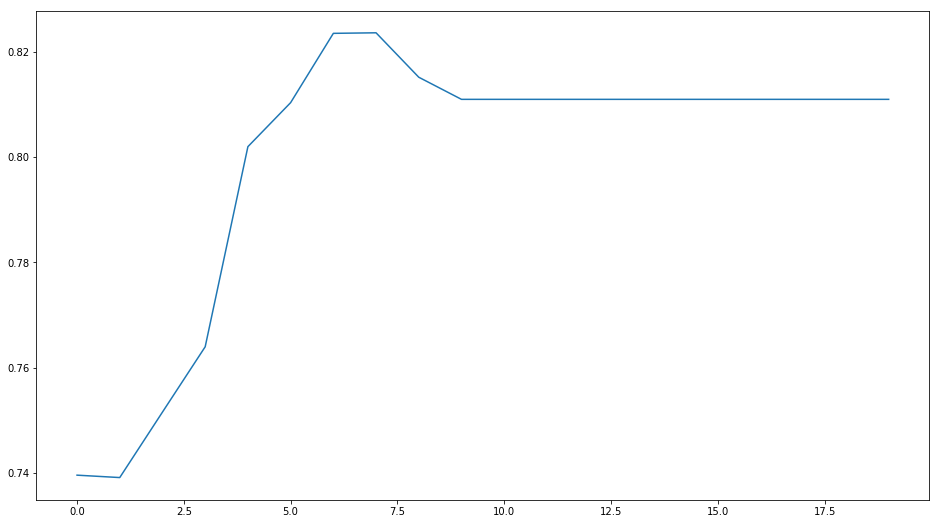

In [338]:
trees = 20
rf = RandomForestRegressor(n_estimators=trees, n_jobs=-1)
%time rf.fit(X_train, Y_train)
print_score(rf)
plt.figure(figsize=(16, 9))
plt.plot([metrics.r2_score(Y_valid, np.mean(preds[:i+1], axis=0)) for i in range(trees)])

### ExtraTreesRegressor

Instead of trying every possible split for all the variables, it randomly tries a few splits for a few variables.
- training is faster
- it has more randomness
- it is an option worth considering
- bootstrap default is `False`, because it uses a different approach to create random trees (instead of limiting the number of samples seen by each tree, it limits the number of features)

In [339]:
etr = ExtraTreesRegressor(n_jobs=-1)
%time etr.fit(X_train, Y_train)
print_score(etr)

Wall time: 132 ms


{'rmsle_train': 0.0,
 'rmsle_valid': 0.1447652580812529,
 'score_train': 1.0,
 'score_valid': 0.860965554867844}

### OOB score
When bagging is used, each tree is trained on a different subset of samples. The `out of bag` is calculated by validating each tree on the subset of data which was left out of its training bag. Generally it tends to underestimate slightly.

In [340]:
rf = RandomForestRegressor(n_estimators=20, n_jobs=-1, oob_score=True)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 269 ms


{'rmsle_train': 0.06320819666080546,
 'rmsle_valid': 0.1583179602949057,
 'score_train': 0.9761499501837034,
 'score_valid': 0.7715571686341427,
 'oob': 0.8490768565795854}

### Playing with parameters to reduce overfitting
- max_depth - maximum depth of a tree
- min_samples_leaf - minimum number of samples which can make a leaf
- max_features - maximum number of features to take into accunt on a split

It is worth mentiioning grid search for parameter optimization (http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html)

Keep tinkering with these and see how it fits best.

In [376]:
trees = 30
rf = RandomForestRegressor(n_estimators=trees, n_jobs=-1, min_samples_leaf=5, oob_score=True, max_features=0.5)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 164 ms


{'rmsle_train': 0.10376405529676469,
 'rmsle_valid': 0.15135410711150546,
 'score_train': 0.938405458333894,
 'score_valid': 0.8239055735392868,
 'oob': 0.8603400151579711}

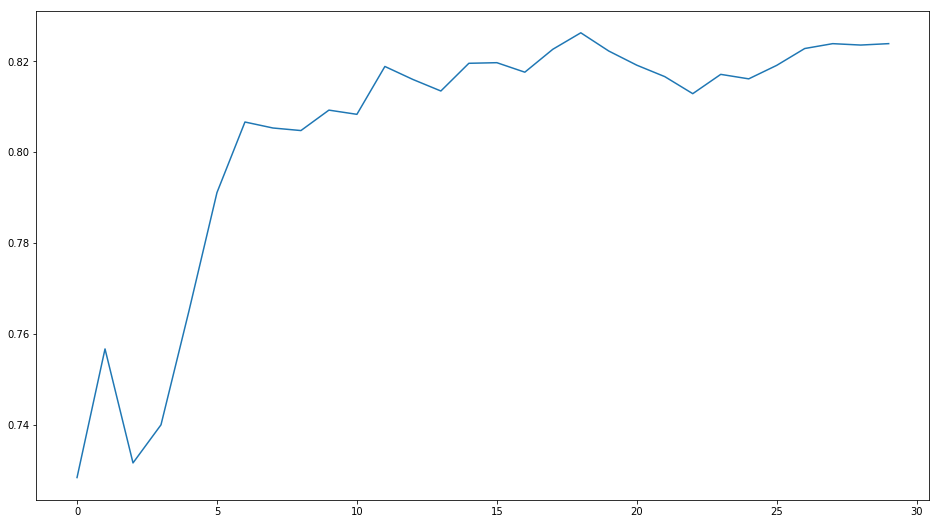

In [378]:
preds = np.stack([t.predict(X_valid) for t in rf.estimators_])
plt.figure(figsize=(16, 9))
plt.plot([metrics.r2_score(Y_valid, np.mean(preds[:i+1], axis=0)) for i in range(trees)])

Standard deviation tells us how tree predictions are spread from the average.

Low standard deviation means that numbers are all close to the average.

If the stddev is large, it means that there are some outliers within the trees.

In [380]:
np.mean(np.log(preds[:, 0])), np.std(np.log(preds[:, 0]))

(11.598651252146755, 0.1313932464490037)

## Understanding features and validation data

Take the raw validation data and add two more useful columns to it.

Logarithmic scale is used because the evaluation method is RMSLE (root mean sqaure log error).

In [381]:
raw_valid = pd.read_csv('data/train.csv', low_memory=False)
raw_valid = raw_valid[train_len:].reset_index(drop=True)
raw_valid.SalePrice = np.log(raw_valid.SalePrice)

- pred_std - standard deviation of tree predictions
- pred - mean of tree predictions

In [382]:
for i in range(len(preds)):
    preds[i] = np.log(preds[i])
raw_valid['pred_std'] = np.std(preds, axis=0)
raw_valid['pred'] = np.mean(preds, axis=0)

### Example of looking at a feature in particular (SaleCondition)

In [383]:
raw_valid.SaleCondition.describe()

count        260
unique         5
top       Normal
freq         219
Name: SaleCondition, dtype: object

A nicer way look at the distribution.

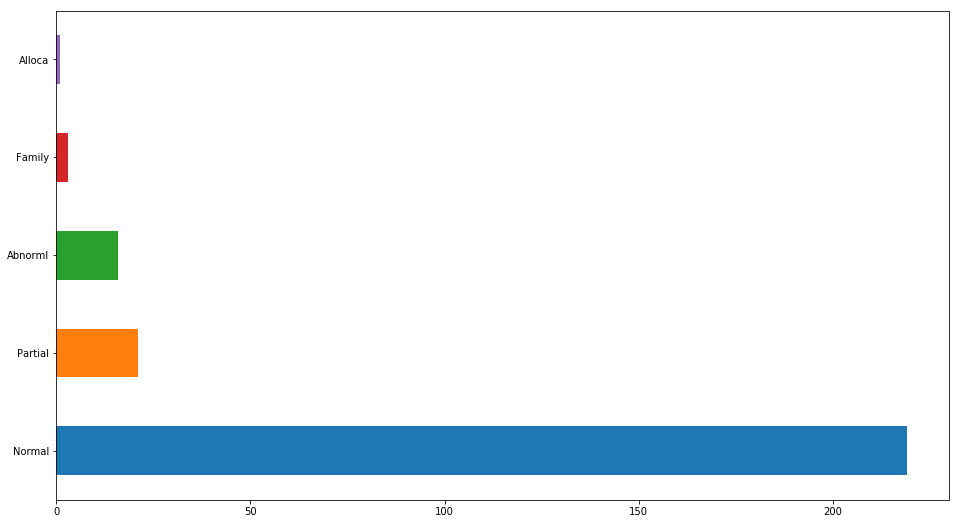

In [384]:
raw_valid.SaleCondition.value_counts().plot.barh(figsize=(16, 9))

Take a look at the mean of SalePrice, pred and pred_std for each type of SaleCondition.

In [385]:
flds = ['SaleCondition', 'SalePrice', 'pred', 'pred_std']
sale_cond = raw_valid[flds].groupby('SaleCondition', as_index=False).mean()
display(sale_cond)

,SaleCondition,SalePrice,pred,pred_std
0,Abnorml,11.787943,11.870087,0.137351
1,Alloca,12.524417,12.208427,0.181058
2,Family,11.808560,11.864150,0.212808
3,Normal,12.006903,12.014040,0.140876
4,Partial,12.343429,12.399610,0.118106


### Reality check - see how confident we are in predicting each group

How actual data looks like.

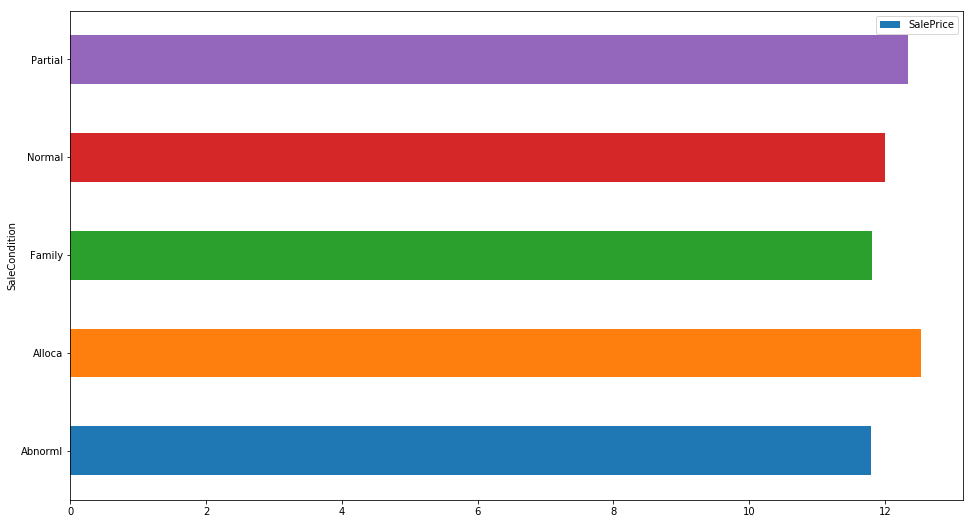

In [386]:
sale_cond = sale_cond[~pd.isnull(sale_cond.SalePrice)] # remove categories for which there is no data
sale_cond.plot('SaleCondition', 'SalePrice', 'barh', figsize=(16, 9))

How do we predict.

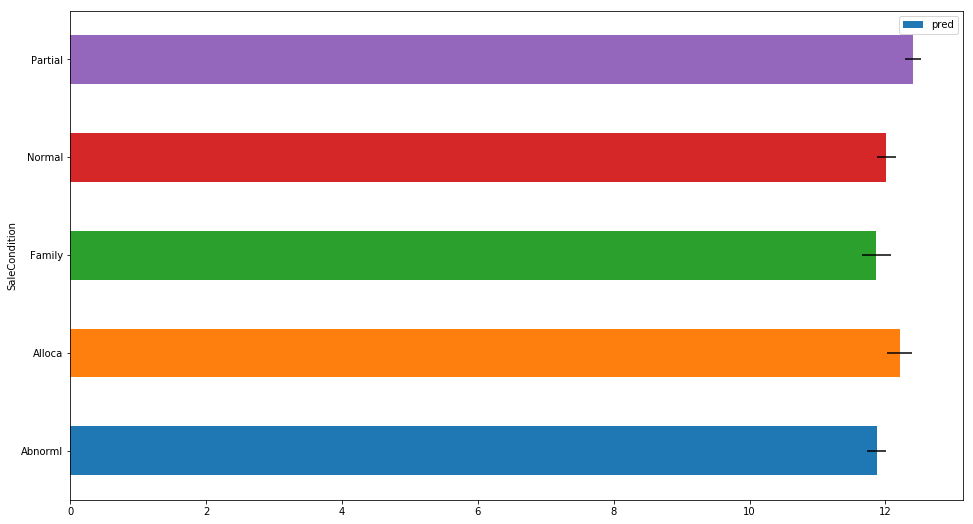

In [388]:
sale_cond.plot('SaleCondition', 'pred', 'barh', xerr='pred_std', figsize=(16, 9))

### Feature importance

- when looking at data, it is always worth making a decent random forest first and checking out the feature importance

In [404]:
trees = 30
rf = RandomForestRegressor(n_estimators=trees, n_jobs=-1, min_samples_leaf=5, oob_score=True, max_features=0.5)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 194 ms


{'rmsle_train': 0.10306931691851326,
 'rmsle_valid': 0.1473349537370729,
 'score_train': 0.9371131108803451,
 'score_valid': 0.8354269439065126,
 'oob': 0.8519336953058706}

In [68]:
def rf_feat_importance(rf, cols):
    return pd.DataFrame({'cols':cols, 'imp':rf.feature_importances_}).sort_values('imp', ascending=False)

Feature importance is calculated like this:
- train a random forest on the original dataset
- for each column:
    - shuffle the data for that feature
    - importance = original score - score with mangled column

The more important a feature is, the more of an impact is going to have on the score after its column is mangled.

In [406]:
fi = rf_feat_importance(rf, X_train.columns)
display(fi[:10])

,cols,imp
16,OverallQual,0.340112
45,GrLivArea,0.159048
60,GarageCars,0.132445
37,TotalBsmtSF,0.049022
18,YearBuilt,0.034112
61,GarageArea,0.032636
42,1stFlrSF,0.031750
26,ExterQual,0.028096
33,BsmtFinSF1,0.024225
29,BsmtQual,0.017020


#### Look at where feature importance flattens.

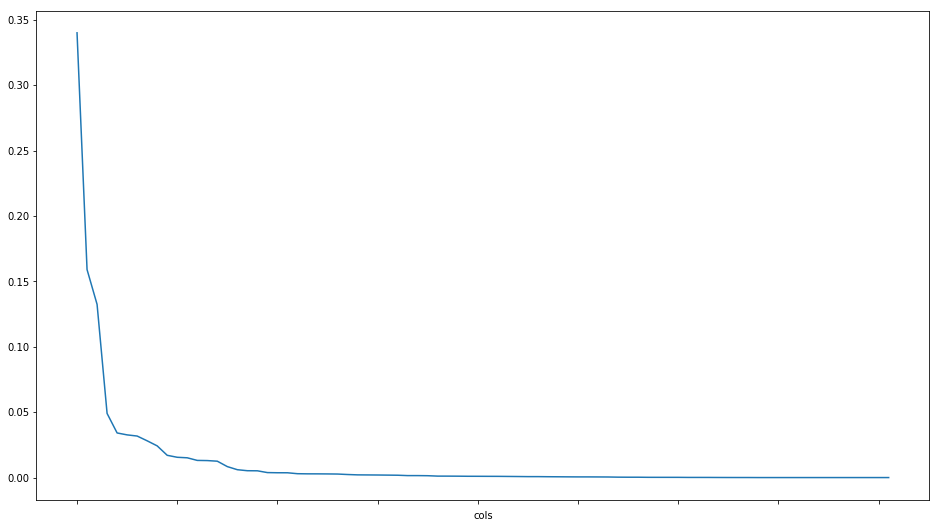

In [495]:
fi.plot('cols', 'imp', figsize=(16,9), legend=False);

Keeping features above 0.003 seems to be a good starting point.

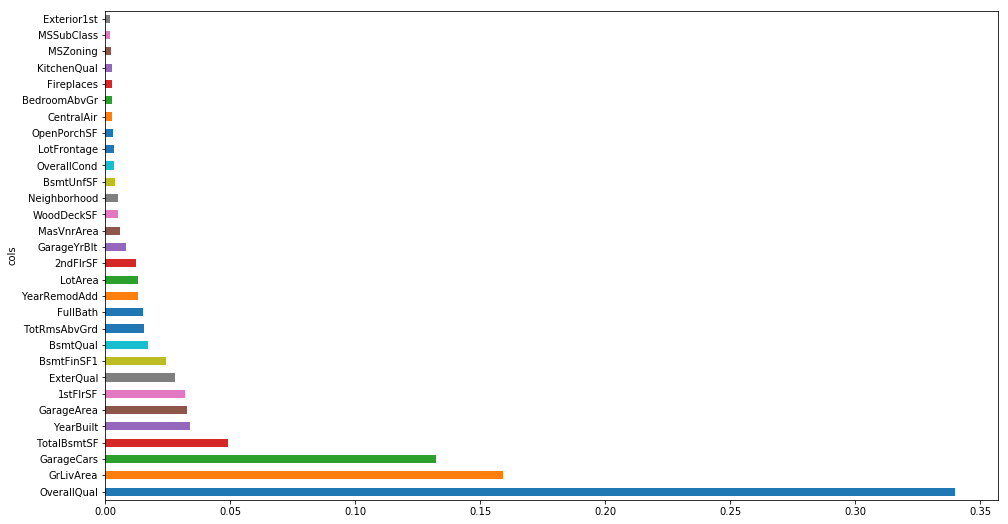

In [496]:
fi[:30].plot('cols', 'imp', 'barh', figsize=(16, 9), legend=False)

### Throw away unimportant columns and see what happens

What I do now is start with a threshold of 0.003 and from there move up or down. If the score stays the same or improve, it means that I've identified only the important features.
I ended up using 0.001 as treshold.

In [492]:
to_keep = fi[fi.imp >= 0.001].cols
len(to_keep)

39

#### Now check the same model again but using only the selected columns and see it it makes any difference.

Baseline
```
{'rmsle_train': 0.10306931691851326,
 'rmsle_valid': 0.1473349537370729,
 'score_train': 0.9371131108803451,
 'score_valid': 0.8354269439065126,
 'oob': 0.8519336953058706}
```

In [425]:
# Create a backup so we could come back to previous data faster.
X_train_bk = X_train.copy()
X_valid_bk = X_valid.copy()

In [485]:
X_train = X_train_bk[to_keep].copy()
X_valid = X_valid_bk[to_keep].copy()

In [490]:
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 153 ms


{'rmsle_train': 0.1054379451256381,
 'rmsle_valid': 0.14483864849312875,
 'score_train': 0.9329279100003187,
 'score_valid': 0.8415081573657375,
 'oob': 0.8525467457018637}

Now the plot looks clearer. It also comes with less colinearity.

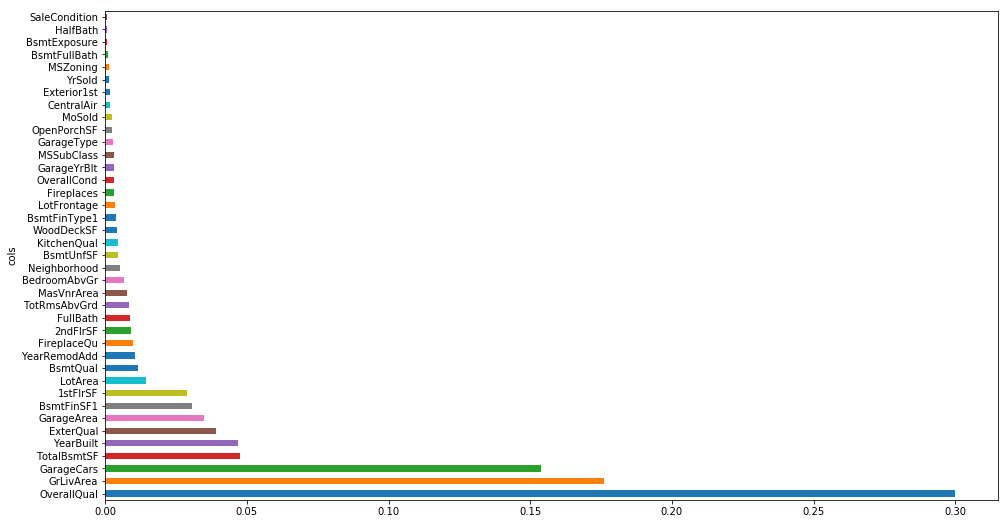

In [497]:
fi_new = rf_feat_importance(rf, X_train.columns)
fi_new.plot('cols', 'imp', 'barh', figsize=(16, 9), legend=False)

#### ExtraTreesRegressor still does a pretty good job.

I think it's better for me to work with one data structure at a time, so I'm going to continue optimizing the RandomForestRegressor for now.

In [498]:
trees = 30
rf = ExtraTreesRegressor(n_estimators=trees, n_jobs=-1)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 148 ms


{'rmsle_train': 0.0,
 'rmsle_valid': 0.13886129621656576,
 'score_train': 1.0,
 'score_valid': 0.8751325291178758}

## Save the selected features and create a checkpoint

In [499]:
df_raw = pd.read_feather('df_raw.feather')
df_keep = pd.concat([df_raw[to_keep], df_raw.SalePrice], axis=1)
df_keep.to_feather('df_keep.feather')

### Checkpoint

In [27]:
df_keep = pd.read_feather('df_keep.feather')

In [28]:
X_df = df_keep.drop('SalePrice', axis='columns')
Y_df = df_keep.SalePrice

train_len = 1200
X_train, X_valid = split_vals(X_df, train_len)
Y_train, Y_valid = split_vals(Y_df, train_len)

# default starting index will be 1200
X_valid = X_valid.reset_index(drop=True)
Y_valid = Y_valid.reset_index(drop=True)

## Learning about the best features

In [504]:
fi = fi_new

### Looking at the best features
The ones above 0.014 are standing out.

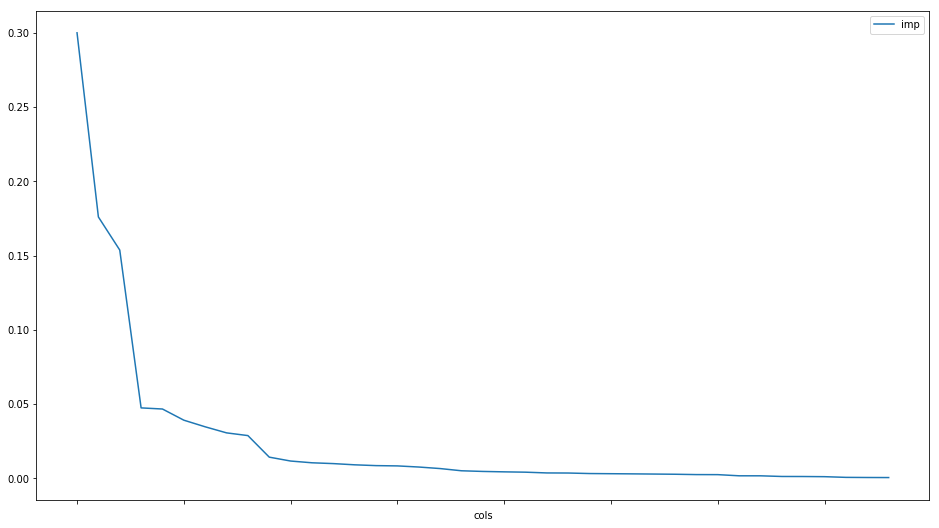

In [517]:
fi.plot('cols', 'imp', figsize=(16, 9))

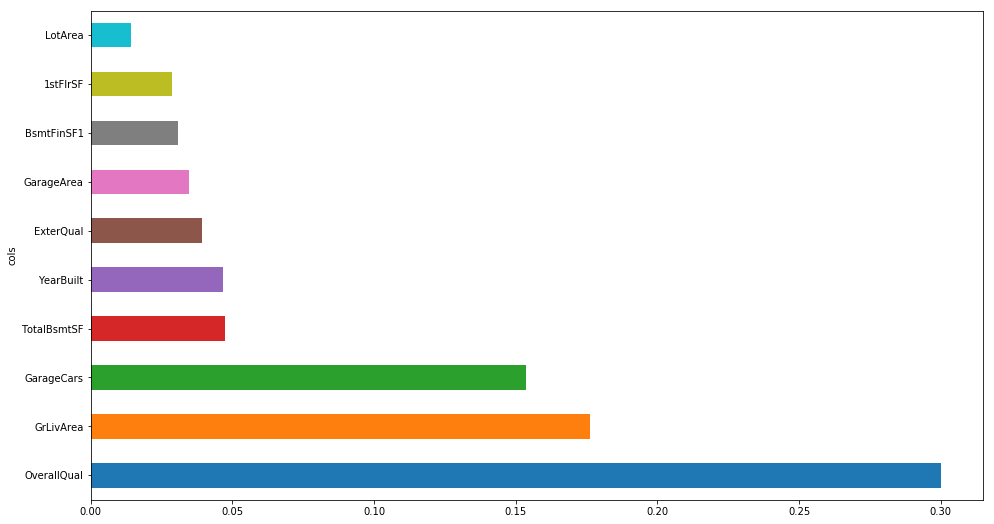

In [518]:
fi_best = fi[fi.imp >= 0.014]
fi_best.plot('cols', 'imp', 'barh', figsize=(16, 9), legend=False)

In [519]:
display(fi_best)

,cols,imp
0,OverallQual,0.300082
1,GrLivArea,0.176062
2,GarageCars,0.153786
3,TotalBsmtSF,0.047492
4,YearBuilt,0.046737
7,ExterQual,0.039218
5,GarageArea,0.034754
8,BsmtFinSF1,0.030674
6,1stFlrSF,0.028840
13,LotArea,0.014322


Compute pred and pred_std

In [8]:
# extra
trees = 30
rf = RandomForestRegressor(n_estimators=trees, n_jobs=-1, min_samples_leaf=5, oob_score=True, max_features=0.5)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 156 ms


{'rmsle_train': 0.10302561892515705,
 'rmsle_valid': 0.14773873659163886,
 'score_train': 0.934313163234704,
 'score_valid': 0.8363681598828705,
 'oob': 0.8562568566922505}

In [9]:
preds = np.stack([t.predict(X_valid) for t in rf.estimators_])
raw_valid = pd.read_csv('data/train.csv', low_memory=False)
raw_valid = raw_valid[train_len:].reset_index(drop=True)
raw_valid.SalePrice = np.log(raw_valid.SalePrice)
for i in range(len(preds)):
    preds[i] = np.log(preds[i])
raw_valid['pred_std'] = np.std(preds, axis=0)
raw_valid['pred'] = np.mean(preds, axis=0)

#### 1. OverallQual

OverallQual: Rates the overall material and finish of the house

       10   Very Excellent
       9    Excellent
       8    Very Good
       7    Good
       6    Above Average
       5    Average
       4    Below Average
       3    Fair
       2    Poor
       1    Very Poor

In [10]:
flds = ['OverallQual', 'SalePrice', 'pred', 'pred_std']
overall_qual = raw_valid[flds].groupby('OverallQual', as_index=False).mean()
display(overall_qual)

,OverallQual,SalePrice,pred,pred_std
0,3,11.251761,11.406417,0.238242
1,4,11.523041,11.582837,0.166406
2,5,11.818868,11.822076,0.130804
3,6,11.972891,11.955754,0.136696
4,7,12.234462,12.234276,0.115084
5,8,12.472182,12.513796,0.143025
6,9,12.761254,12.786980,0.183402
7,10,12.682516,12.860445,0.198575


Validation data reflects the training pretty well

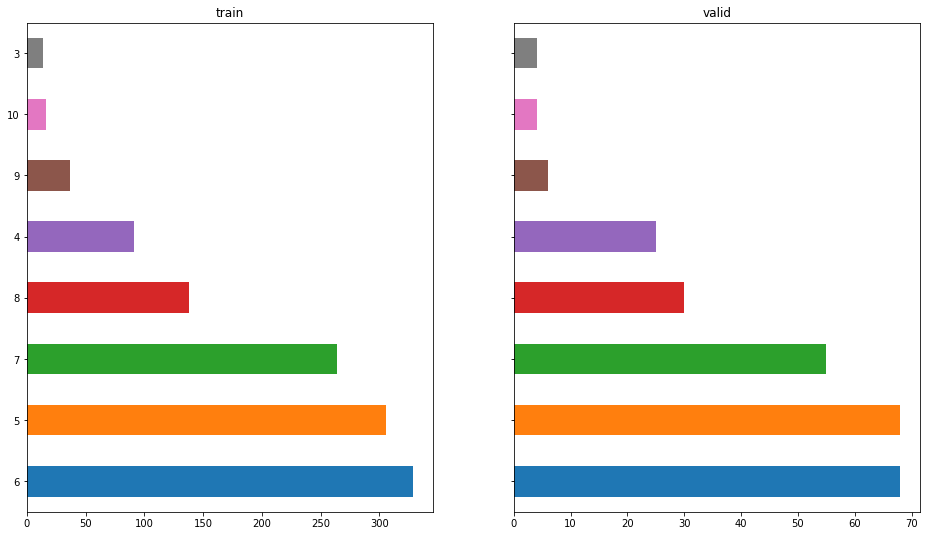

In [68]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 9))

X_train.OverallQual.value_counts().plot.barh(ax=axes[0], title='train')
X_valid.OverallQual.value_counts().plot.barh(ax=axes[1], title='valid')

It is normal to be less confident in categories with less members. The more data you have for a category, the better predictions are for it.

#### 2. GrLivArea
GrLivArea: Above grade (ground) living area square feet

As GrLivArea increases, so does the sale price.

In [12]:
flds = ['GrLivArea', 'SalePrice', 'pred', 'pred_std']
gr_liv_area = raw_valid[flds].groupby('GrLivArea', as_index=False).mean()
display(gr_liv_area.describe())

,GrLivArea,SalePrice,pred,pred_std
count,227.000000,227.000000,227.000000,227.000000
mean,1581.678414,12.041954,12.055841,0.139447
std,569.550325,0.374327,0.347089,0.052899
min,630.000000,10.868568,11.199810,0.040769
25%,1189.000000,11.775290,11.814452,0.096585
50%,1537.000000,12.028739,12.017856,0.136231
75%,1863.000000,12.276062,12.282646,0.167478
max,5642.000000,13.053013,12.965362,0.329911


Seems that this model is better at predicting houses with smaller GrLivArea. I think this is because in the validion set there are only 227 distinct values, and the plot shows that most of them are bellow 200.

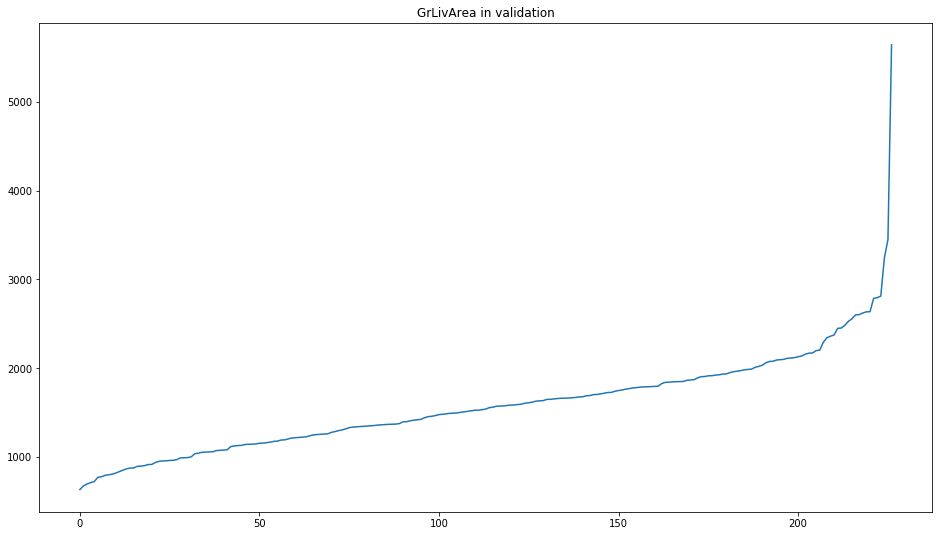

In [84]:
gr_liv_area.GrLivArea.plot(figsize=(16, 9), title='GrLivArea in validation')

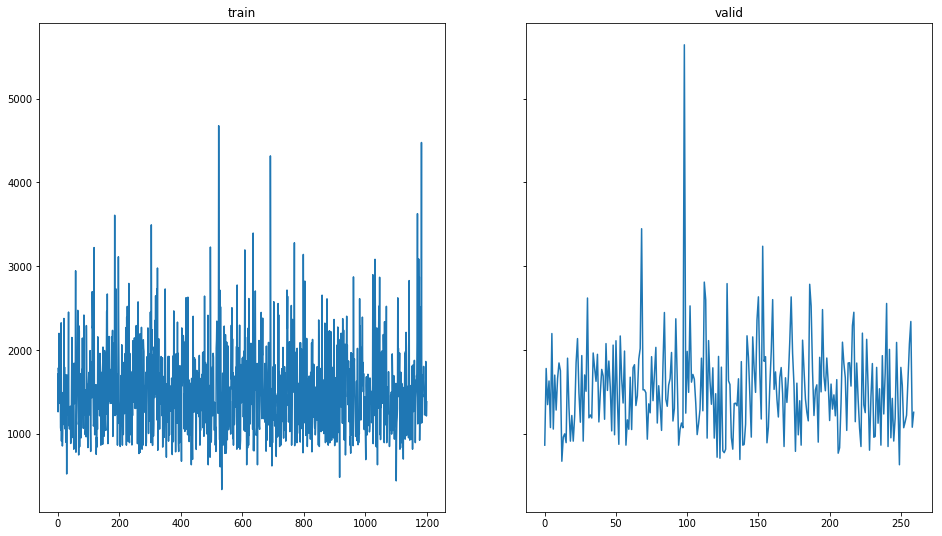

In [88]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 9))

X_train.GrLivArea.plot(ax=axes[0], title='train')
X_valid.GrLivArea.plot(ax=axes[1], title='valid')

There is an *outlier* in the validation set! That is the maximum GrLivArea.

In [126]:
X_train.GrLivArea.mean(), X_valid.GrLivArea.mean(), X_train.GrLivArea.std(), X_valid.GrLivArea.std()

(1508.9775, 1545.4, 517.3803298011412, 561.4323876200285)

The mean and standard deviation are quite close, so that's a good sign.

In [45]:
df_keep[df_keep.GrLivArea > 4000][['GrLivArea', 'YrSold', 'SalePrice']]

,GrLivArea,YrSold,SalePrice
523,4676,2007,184750
691,4316,2007,755000
1182,4476,2007,745000
1298,5642,2008,160000


In [46]:
raw_valid[raw_valid.GrLivArea > 4000][['GrLivArea', 'YrSold', 'SalePrice', 'pred']]

,GrLivArea,YrSold,SalePrice,pred
98,5642,2008,11.982929,12.927207


##### Notes
- Training and validation are not similar!

#### 3. GarageCars
GarageCars: Size of garage in car capacity

In [102]:
flds = ['GarageCars', 'SalePrice', 'pred', 'pred_std']
gr_liv_area = raw_valid[flds].groupby('GarageCars', as_index=False).mean()
display(gr_liv_area.describe())

,GarageCars,SalePrice,pred,pred_std
count,5.000000,5.000000,5.000000,5.000000
mean,2.000000,11.948382,11.965601,0.171730
std,1.581139,0.398857,0.354081,0.052457
min,0.000000,11.440247,11.601556,0.124810
25%,1.000000,11.739006,11.754071,0.139068
50%,2.000000,11.963006,11.868366,0.142837
75%,3.000000,12.091174,12.091736,0.203378
max,4.000000,12.508476,12.512277,0.248556


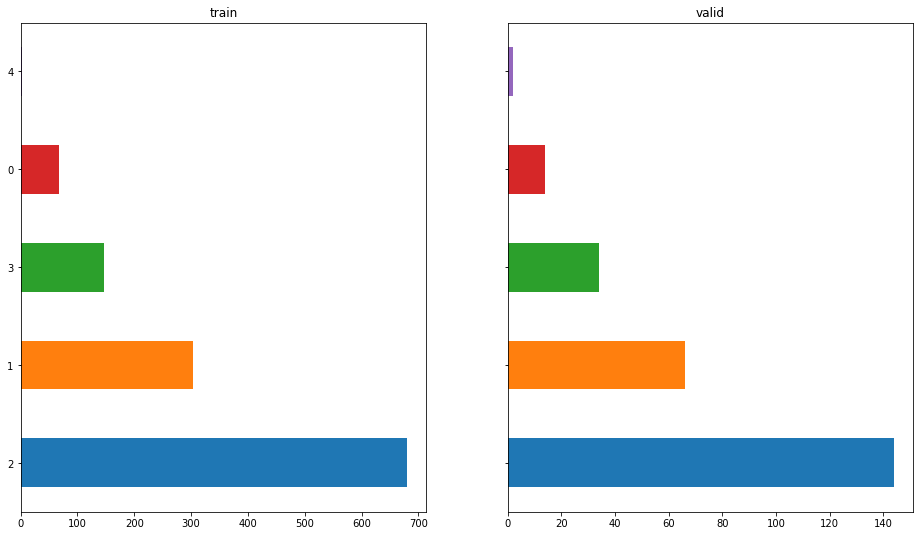

In [108]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 9))

X_train.GarageCars.value_counts().plot.barh(ax=axes[0], title='train')
X_valid.GarageCars.value_counts().plot.barh(ax=axes[1], title='valid')

This seems to be quite a nice feature, training and validation looking similar and predictions close to the actual sale price.

#### 4. TotalBsmtSF
TotalBsmtSF: Total square feet of basement area

In [111]:
flds = ['TotalBsmtSF', 'SalePrice', 'pred', 'pred_std']
data = raw_valid[flds].groupby('TotalBsmtSF', as_index=False).mean()
display(data.describe())

,TotalBsmtSF,SalePrice,pred,pred_std
count,202.000000,202.000000,202.000000,202.000000
mean,1136.866337,12.077326,12.090990,0.136401
std,543.812803,0.366150,0.335678,0.050442
min,0.000000,10.868568,11.262782,0.039233
25%,803.250000,11.839527,11.861332,0.098250
50%,1033.000000,12.043260,12.022583,0.131783
75%,1390.500000,12.345835,12.332482,0.166122
max,6110.000000,13.053013,12.971973,0.319747


Again, we can see that smaller values get better predictions. The model tends to underestimate when the TotalBsmtSF gets unusually large.

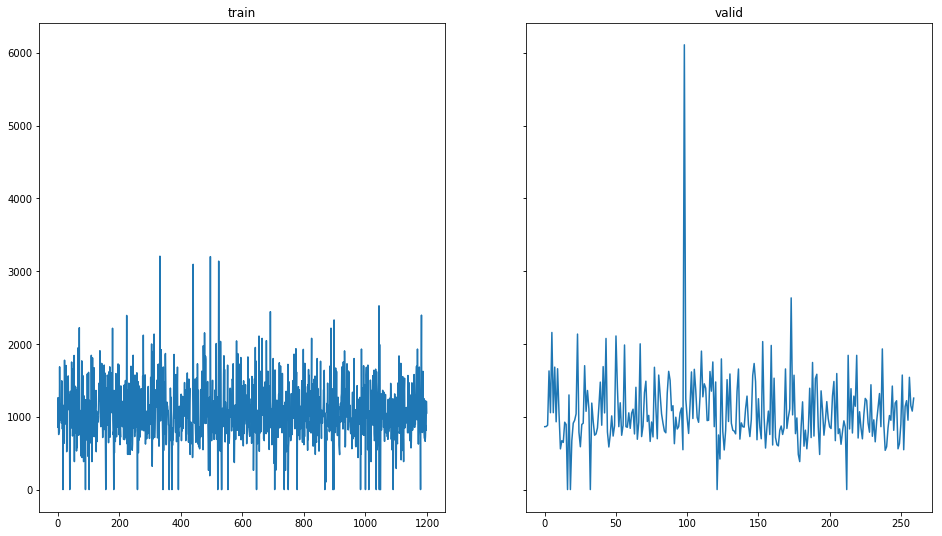

In [115]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 9))

X_train.TotalBsmtSF.plot(ax=axes[0], title='train')
X_valid.TotalBsmtSF.plot(ax=axes[1], title='valid')

In [127]:
X_train.TotalBsmtSF.mean(), X_valid.TotalBsmtSF.mean(), X_train.TotalBsmtSF.std(), X_valid.TotalBsmtSF.std()

(1054.7, 1070.0269230769231, 419.9963064296067, 517.0920502788052)

This feature is similar to **GrLivArea**. There are is an outlier clearly visible above.

In [27]:
df_keep[df_keep.TotalBsmtSF > 3000][['TotalBsmtSF', 'SalePrice']]

,TotalBsmtSF,SalePrice
332,3206,284000
440,3094,555000
496,3200,430000
523,3138,184750
1298,6110,160000


##### Notes
- outliers

#### 5. YearBuilt
YearBuilt: Original construction date

In [128]:
flds = ['YearBuilt', 'SalePrice', 'pred', 'pred_std']
data = raw_valid[flds].groupby('YearBuilt', as_index=False).mean()
display(data.describe())

,YearBuilt,SalePrice,pred,pred_std
count,83.000000,83.000000,83.000000,83.000000
mean,1957.469880,11.939244,11.960662,0.151502
std,32.572372,0.322170,0.298727,0.049979
min,1872.000000,11.074421,11.260143,0.053932
25%,1930.500000,11.729213,11.767066,0.118501
50%,1960.000000,11.881165,11.897151,0.141978
75%,1983.000000,12.150634,12.162145,0.181006
max,2009.000000,12.850555,12.812385,0.314380


It looks like the model is better at predicting older houses. Our validation has a mean of ~1957 and a standard deviation of ~32 years.

In [129]:
X_train.YearBuilt.mean(), X_valid.YearBuilt.mean(), X_train.YearBuilt.std(), X_valid.YearBuilt.std()

(1971.3508333333334, 1970.8846153846155, 30.048408249647824, 30.96208532464711)

Training and validation are balanced. We can think of houses made after 2001 as outliers, so that could be an explanation for the increase in pred_std when it comes to newer houses.

#### 6. ExterQual
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [140]:
raw_valid.ExterQual.describe()

count     260
unique      4
top        TA
freq      159
Name: ExterQual, dtype: object

Checking predictions and actual prices

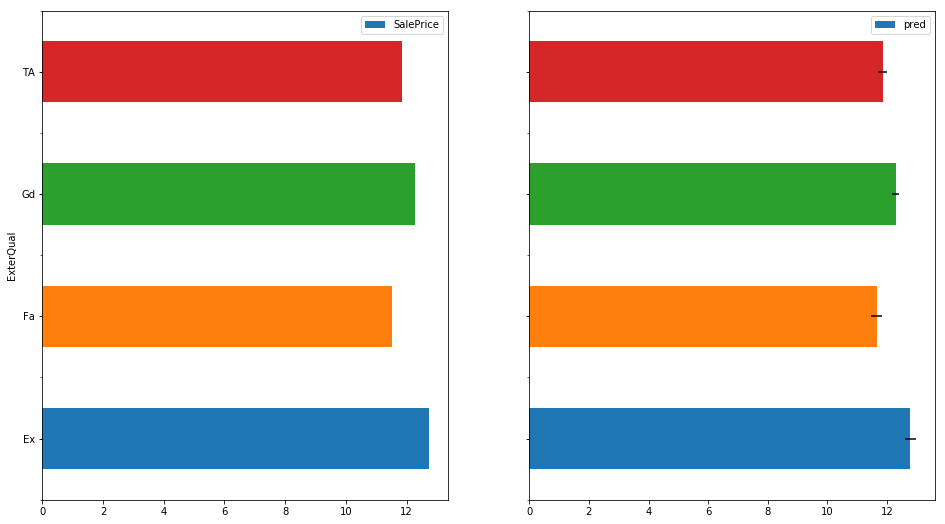

In [147]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 9))
flds = ['ExterQual', 'SalePrice', 'pred', 'pred_std']
exter_qual = raw_valid[flds].groupby('ExterQual', as_index=False).mean()
exter_qual.plot('ExterQual', 'SalePrice', 'barh', ax=axes[0])
exter_qual.plot('ExterQual', 'pred', 'barh', xerr='pred_std', ax=axes[1])

In [160]:
raw_valid.ExterQual.astype('category').cat.categories

Index(['Ex', 'Fa', 'Gd', 'TA'], dtype='object')

As a note, it would be nice to have this categorical feature ordered.

##### Notes
- order categories

#### 7. GarageArea
GarageArea: Size of garage in square feet

In [166]:
flds = ['GarageArea', 'SalePrice', 'pred', 'pred_std']
data = raw_valid[flds].groupby('GarageArea', as_index=False).mean()
display(data.describe())

,GarageArea,SalePrice,pred,pred_std
count,150.000000,150.000000,150.000000,150.000000
mean,540.873333,12.143951,12.147267,0.137300
std,216.936056,0.367244,0.353796,0.048130
min,0.000000,10.976782,11.242776,0.044615
25%,391.500000,11.876685,11.887875,0.102656
50%,519.000000,12.111771,12.118451,0.131405
75%,662.750000,12.382118,12.380620,0.166122
max,1418.000000,13.053013,12.971973,0.319747


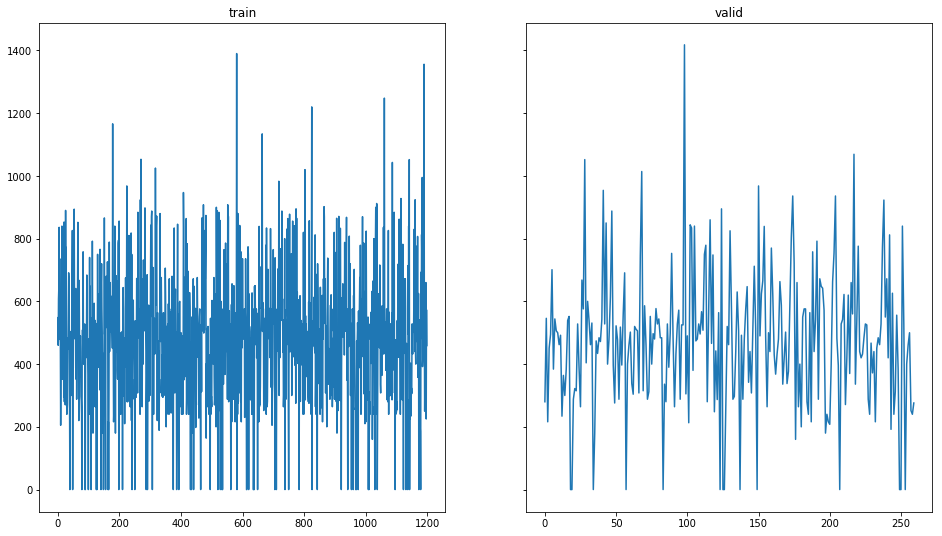

In [168]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 9))

X_train.GarageArea.plot(ax=axes[0], title='train')
X_valid.GarageArea.plot(ax=axes[1], title='valid')

In [169]:
X_train.GarageArea.mean(), X_valid.GarageArea.mean(), X_train.GarageArea.std(), X_valid.GarageArea.std()

(472.6041666666667, 474.7153846153846, 212.72244399950645, 219.14051959865233)

Training and validation seem quite balanced. Of course, since most garage areas ar bellow 700 square feet, outliers (such as the one with an 1418 SF garage) are a bit underestimated.

In [30]:
df_keep[df_keep.GarageArea > 1200][['GarageArea', 'SalePrice']]

,GarageArea,SalePrice
581,1390,253293
825,1220,385000
1061,1248,81000
1190,1356,168000
1298,1418,160000


#### 8. BsmtFinSF1
BsmtFinSF1: Type 1 finished square feet

In [172]:
flds = ['BsmtFinSF1', 'SalePrice', 'pred', 'pred_std']
data = raw_valid[flds].groupby('BsmtFinSF1', as_index=False).mean()
display(data.describe())

,BsmtFinSF1,SalePrice,pred,pred_std
count,149.000000,149.000000,149.000000,149.000000
mean,685.765101,12.068719,12.067325,0.132252
std,542.988893,0.375354,0.355638,0.049401
min,0.000000,10.976782,11.267286,0.040879
25%,384.000000,11.827736,11.836939,0.093938
50%,616.000000,12.000892,11.984874,0.128534
75%,830.000000,12.323856,12.308102,0.160651
max,5644.000000,13.053013,12.959639,0.314380


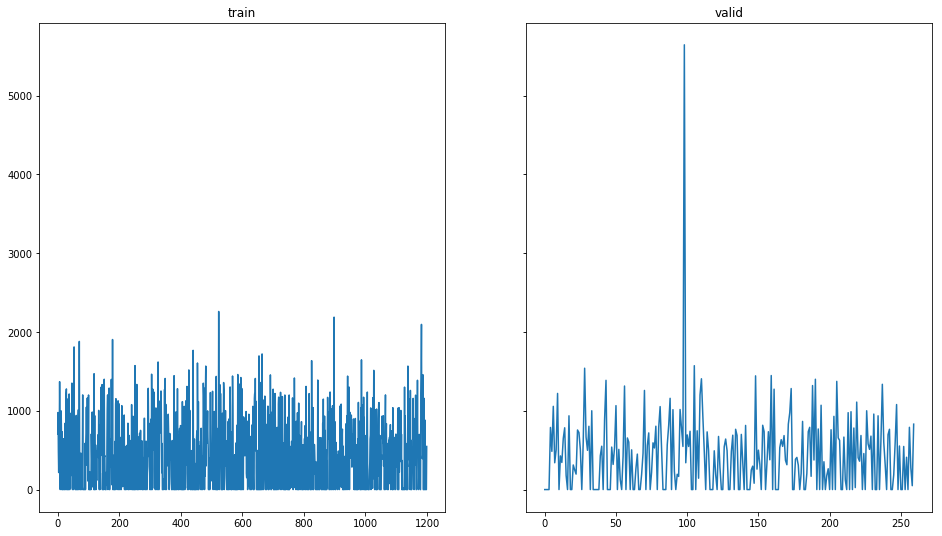

In [173]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 9))

X_train.BsmtFinSF1.plot(ax=axes[0], title='train')
X_valid.BsmtFinSF1.plot(ax=axes[1], title='valid')

The feature looks very similar to **TotalBsmtSF**, including the outlier.

In [31]:
df_keep[df_keep.BsmtFinSF1 > 4000][['BsmtFinSF1', 'SalePrice']]

,BsmtFinSF1,SalePrice
1298,5644,160000


##### Notes
- outliers
- quite similar with TotalBsmtSF

#### 9. 1stFlrSF
1stFlrSF: First Floor square feet

In [175]:
flds = ['1stFlrSF', 'SalePrice', 'pred', 'pred_std']
data = raw_valid[flds].groupby('1stFlrSF', as_index=False).mean()
display(data.describe())

,1stFlrSF,SalePrice,pred,pred_std
count,217.000000,217.000000,217.000000,217.000000
mean,1222.649770,12.053842,12.068400,0.137579
std,453.637395,0.365232,0.336358,0.052381
min,483.000000,10.868568,11.242776,0.039233
25%,920.000000,11.809319,11.842172,0.099054
50%,1133.000000,12.031124,12.007939,0.131425
75%,1478.000000,12.323856,12.308102,0.165341
max,4692.000000,13.053013,12.971973,0.319747


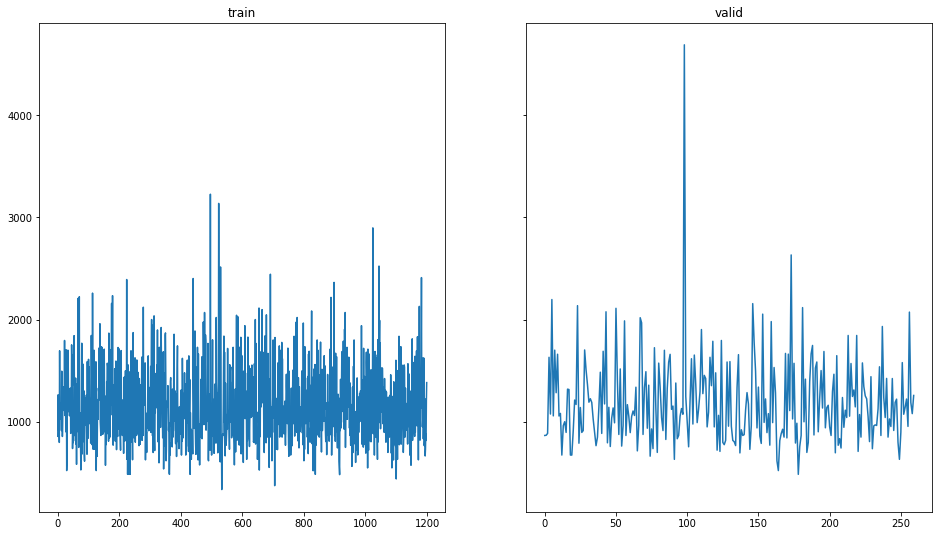

In [178]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 9))

X_train['1stFlrSF'].plot(ax=axes[0], title='train')
X_valid['1stFlrSF'].plot(ax=axes[1], title='valid')

The standard deviation on the validation set increases so dramatically because of that spike.

In [179]:
X_train['1stFlrSF'].mean(), X_valid['1stFlrSF'].mean(), X_train['1stFlrSF'].std(), X_valid['1stFlrSF'].std()

(1157.4308333333333, 1186.6076923076923, 375.2386066125784, 435.14403590872297)

In [34]:
df_keep[df_keep['1stFlrSF'] > 4000][['1stFlrSF', 'SalePrice']]

,1stFlrSF,SalePrice
1298,4692,160000


##### Notes
- outliers

#### 10. LotArea
LotArea: Lot size in square feet

In [181]:
flds = ['LotArea', 'SalePrice', 'pred', 'pred_std']
data = raw_valid[flds].groupby('LotArea', as_index=False).mean()
display(data.describe())

,LotArea,SalePrice,pred,pred_std
count,225.000000,225.000000,225.000000,225.000000
mean,10740.257778,12.046651,12.059226,0.137169
std,6574.689353,0.379823,0.349584,0.053375
min,1533.000000,10.868568,11.242776,0.039233
25%,8125.000000,11.805595,11.823327,0.097955
50%,9808.000000,12.031124,12.007541,0.131032
75%,12160.000000,12.314927,12.279907,0.169550
max,63887.000000,13.053013,12.971973,0.319747


Notice how the model overestimates houses with smaller lot areas.

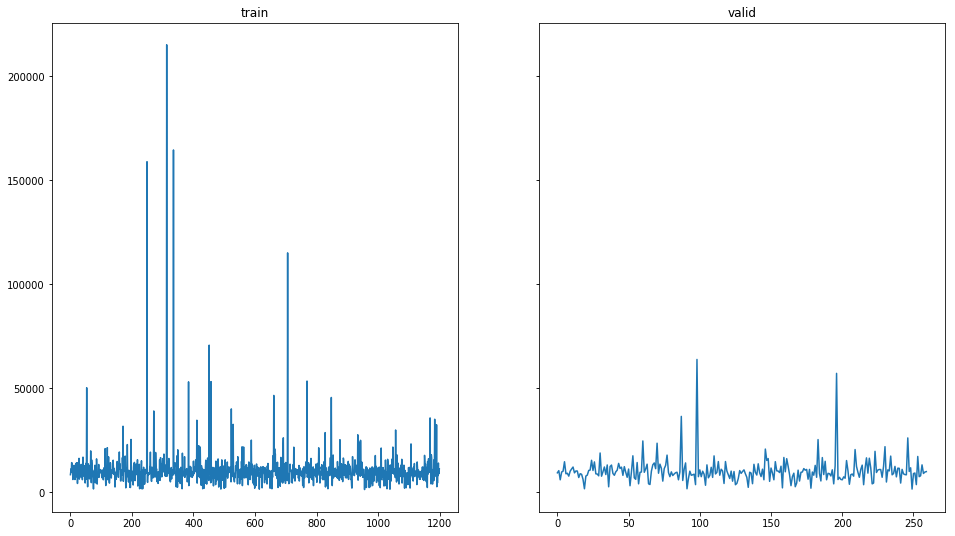

In [182]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 9))

X_train.LotArea.plot(ax=axes[0], title='train')
X_valid.LotArea.plot(ax=axes[1], title='valid')

There are a few spikes which are messing up the standard deviation in the training set.

In [184]:
X_train.LotArea.mean(), X_valid.LotArea.mean(), X_train.LotArea.std(), X_valid.LotArea.std()

(10559.411666666667, 10320.288461538461, 10619.135548638797, 6255.537115217713)

In [37]:
df_keep[df_keep.LotArea > 100000][['LotArea', 'SalePrice']]

,LotArea,SalePrice
249,159000,277000
313,215245,375000
335,164660,228950
706,115149,302000


##### Notes
- Training and validation are not balanced!

### Feature transformations
- Sorted categories:
    - ExterQual [Ex, Gd, TA, Fa, Po]
    - BsmtQual [Ex, Gd, TA, Fa, Po, NA]
    - FireplaceQu [Ex, Gd, TA, Fa, Po, NA]
    - KitchenQual [Ex, Gd, TA, Fa, Po]
    - CentralAir [N, Y]
- The rest of categorical variables are treated using **One Hot Encoding**

In [3]:
df_raw = pd.read_csv('data/train.csv', low_memory=False)
df_keep = pd.read_feather('df_keep.feather')
df_trans = df_raw[df_keep.columns].copy()

In [11]:
def to_category(df):
    for n, c in df.items():
        if not is_numeric_dtype(c):
            df[n] = c.astype('category')

In [ ]:
to_category(df_trans)

In [12]:
def to_ordered(df):
    df.ExterQual.cat.set_categories(['Ex', 'Gd', 'TA', 'Fa', 'Po'], ordered=True, inplace=True)
    df.BsmtQual.cat.set_categories(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], ordered=True, inplace=True)
    df.FireplaceQu.cat.set_categories(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], ordered=True, inplace=True)
    df.KitchenQual.cat.set_categories(['Ex', 'Gd', 'TA', 'Fa', 'Po'], ordered=True, inplace=True)
    df.CentralAir.cat.set_categories(['N', 'Y'], ordered=True, inplace=True)
    
    for c in ('ExterQual', 'BsmtQual', 'FireplaceQu', 'KitchenQual', 'CentralAir'):
        df[c] = df[c].cat.codes

In [ ]:
to_ordered(df_trans)

In [7]:
fix_numeric(df_trans)

In [8]:
# One Hot Encoding
df_trans = pd.get_dummies(df_trans)

In [10]:
df_trans.to_feather('df_trans.feather')

#### Financial crisis of 2007-2008
Checking if Ames has been hit by crisis.

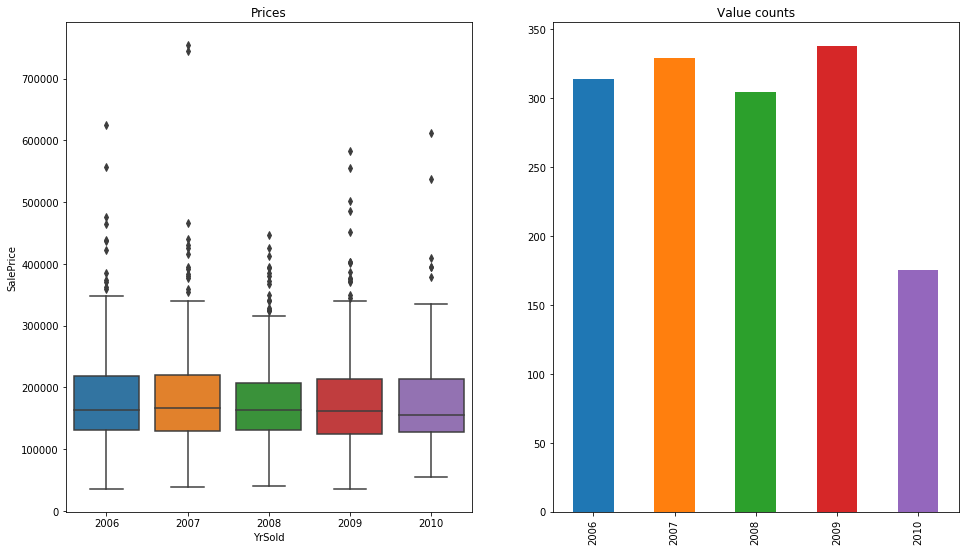

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].set_title('Prices')
axes[1].set_title('Value counts')
sns.boxplot(x=df_trans['YrSold'], y=df_trans['SalePrice'], ax=axes[0])
df_trans.YrSold.value_counts(sort=False).plot(ax=axes[1], kind='bar')

Seems like Ames did really well after the financial crisis, good for them :)

### Training again

In [8]:
df_trans = pd.read_feather('df_trans.feather')
X_df = df_trans.drop('SalePrice', axis='columns')
Y_df = df_trans.SalePrice

train_len = 1200
X_train, X_valid = split_vals(X_df, train_len)
Y_train, Y_valid = split_vals(Y_df, train_len)

# default starting index will be 1200
X_valid = X_valid.reset_index(drop=True)
Y_valid = Y_valid.reset_index(drop=True)

In [193]:
trees = 30
rf = RandomForestRegressor(n_estimators=trees, n_jobs=-1, min_samples_leaf=5, oob_score=True, max_features=0.5)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 147 ms


{'rmsle_train': 0.10288170484884264,
 'rmsle_valid': 0.149586434654141,
 'score_train': 0.9361085101135909,
 'score_valid': 0.8292676905078932,
 'oob': 0.8522879840407463}

There's a little improvement.

In [77]:
fi = rf_feat_importance(rf, X_train.columns)

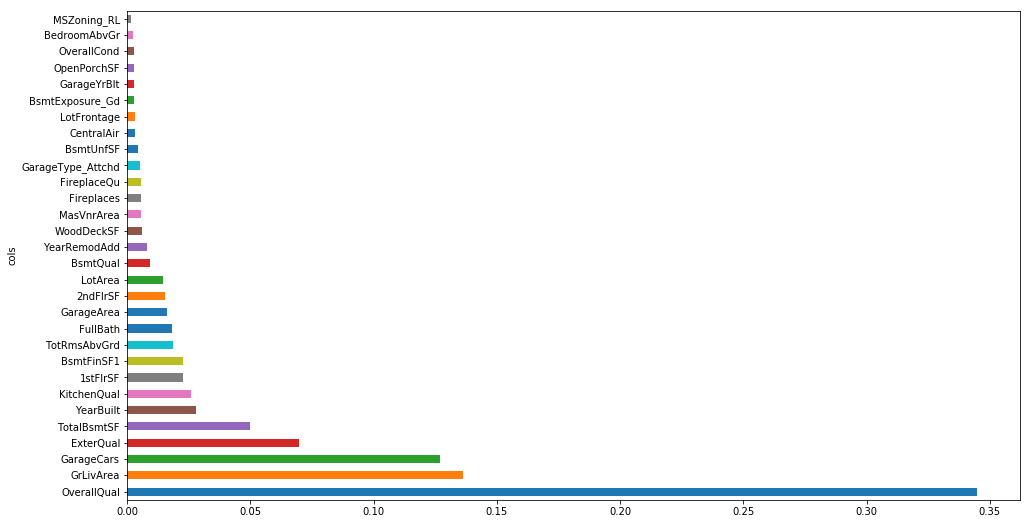

In [78]:
fi[:30].plot('cols', 'imp', 'barh', figsize=(16, 9), legend=False)

## Spearman correlation

This will show similarities between variables.

It is based on Pearson Correlation https://www.spss-tutorials.com/pearson-correlation-coefficient/

Spearman Rank-Order Correlation https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php

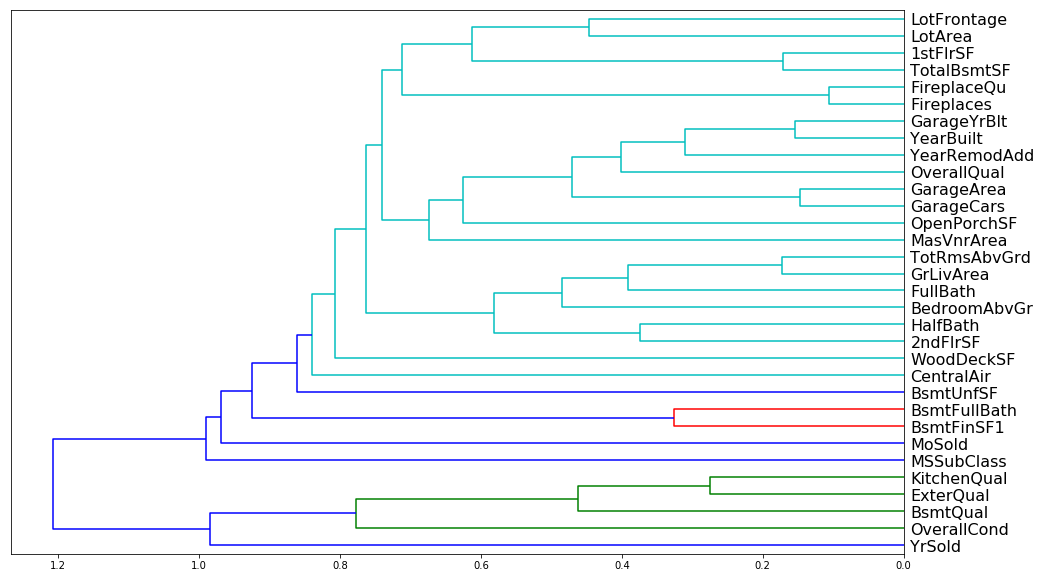

In [130]:
# Taken from Jeremy Howard Machine Learning 1 Lesson 4

# See which neighborhood has the best correlation with the SalePrice
# df_corr = df_trans[[c for c in df_trans.columns if 'Neighborhood' in c or 'SalePrice' in c]]

# Skip one hot encoded columns
df_corr = df_trans[[c for c in df_trans.columns if '_' not in c and 'SalePrice' not in c]]


corr = np.round(scipy.stats.spearmanr(df_corr).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_corr.columns, orientation='left', leaf_font_size=16)
plt.show()

Seems like there are no really strong correlations here, but let's see if we are able to drop FireplaceQu.

In [544]:
# Inspired by Jeremy Howard, Machine Learning 1 Lesson 4
def get_oob(remove_column=None):
    x = X_train if remove_column is None else X_train.drop(remove_column, axis='columns')
    rf = RandomForestRegressor(n_estimators=30, n_jobs=-1, min_samples_leaf=5, oob_score=True, max_features=0.5)
    rf.fit(x, Y_train)
    return rf.oob_score_

In [167]:
get_oob() - get_oob('FireplaceQu')

0.0007478978885625542

Turns out to be neither an improvement nor a loss, so I'll just leave it there.

## Partial dependence

Partial dependence can show how the SalePrice is influenced by a feature.
Let's go back to the idea of the 2007-2008 financial crisis and see if our random forest understood what happened during those years.
It seems that Ames recovered pretty well.
To confirm this, let's look at the partial dependence between SalePrice and YrSold.

In [200]:
# Taken from Jeremy Howard, fastai
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(rf, X_train, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, n_cluster_centers=clusters)

pdp stands for Partial Dependence Plot

Suppose you have sold a house in 2005. If you want to know the price which you woul've got for it in 2009, you can take that row from your dataset, replace YrSold with 2009 and predict its sale price. This can be used as an estimate of how much that particular house is worth in 2009 (or at least a good indicator of how the random forest sees the situation).

By doing this for every possible YrSold and taking the mean of the price predictions, we've obtained a plot which shows how much the year tends to affect SalePrice.

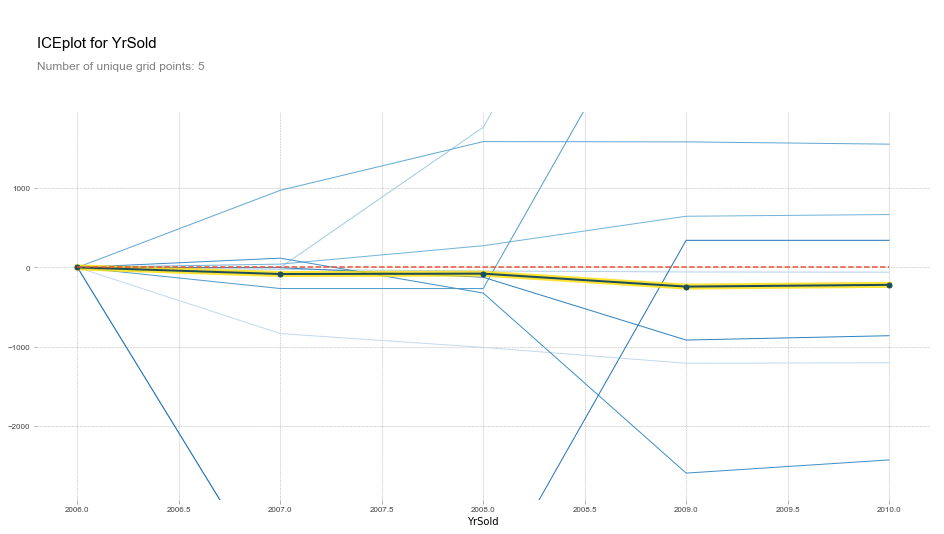

In [201]:
plot_pdp('YrSold', 10)

So it seems that starting from 2008, the value of houses dropped a little. The same house which could've been sold for more in 2007 is sold for less starting with 2008.

## Trying to create a better model

As I look up, I really don't like the score on training vs validation. It might be a case of overfitting.


- 'score_train': 0.9361085101135909
- 'score_valid': 0.8292676905078932

#### Trying some random forests to see if the problem can be solved by changing the parameters

In [49]:
trees = 300
rf = RandomForestRegressor(n_estimators=trees, n_jobs=-1, min_samples_leaf=3, oob_score=True, max_features=0.3)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 724 ms


{'rmsle_train': 0.08725959687265124,
 'rmsle_valid': 0.1424848258136719,
 'score_train': 0.9550844825103527,
 'score_valid': 0.8403433815502218,
 'oob': 0.8662460427100263}

In [51]:
trees = 300
rf = ExtraTreesRegressor(n_estimators=trees, min_samples_leaf=3, max_features=0.3, n_jobs=-1)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 564 ms


{'rmsle_train': 0.07348406034314003,
 'rmsle_valid': 0.13691286274923636,
 'score_train': 0.9670394296755106,
 'score_valid': 0.8547920793896291}

### Trying to predict if a sample is in the validation set

- add a column which shows if a row is part of the validation set
- train a decent random forest classifier
- look at the feature importance , see which columns are problematic

In [136]:
df_ext = pd.read_feather('df_trans.feather')
df_ext['valid'] = 1
train_len = 1200
df_ext.valid[:train_len] = 0
X_df = df_ext.drop('valid', axis='columns')
Y_df = df_ext.valid

In [141]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=10, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_df, Y_df)
m.oob_score_

0.821917808219178

In [142]:
fi = rf_feat_importance(m, X_df.columns)

In [143]:
fi[:10]

,cols,imp
13,LotArea,0.085229
18,BsmtUnfSF,0.065374
1,GrLivArea,0.063021
3,TotalBsmtSF,0.058277
5,GarageArea,0.058164
32,SalePrice,0.054043
21,OpenPorchSF,0.053250
6,1stFlrSF,0.052789
15,GarageYrBlt,0.040280
12,YearRemodAdd,0.040123


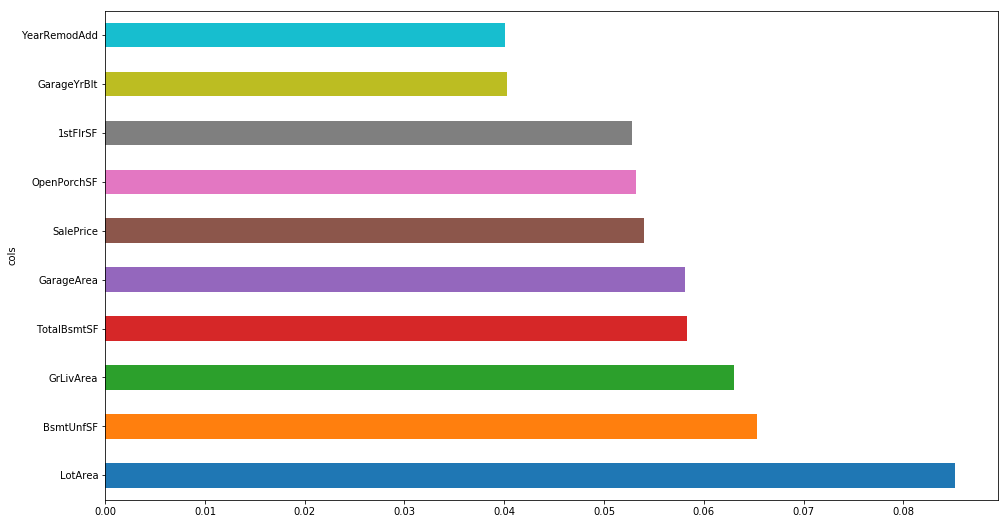

In [153]:
fi[:10].plot('cols', 'imp', 'barh', figsize=(16, 9), legend=False)

I already know about:
    - LotArea
    - GrLivArea
    - TotalBsmtSF
    - 1stFlrSF

In [158]:
X_train = X_df[:train_len]
X_valid = X_df[train_len:]

#### SalePrice

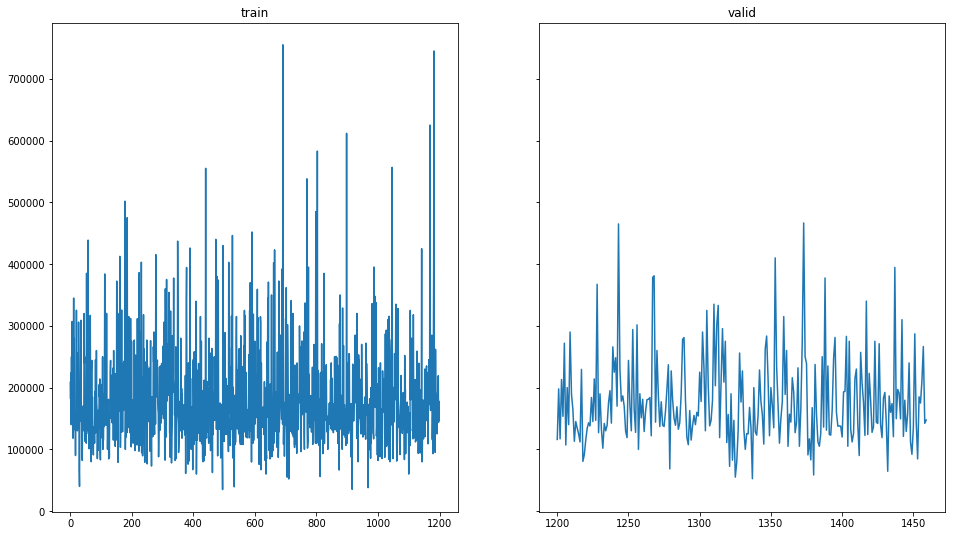

In [159]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(16, 9))

X_train.SalePrice.plot(ax=axes[0], title='train')
X_valid.SalePrice.plot(ax=axes[1], title='valid')

This seems quite unbalanced. I could solve the problem by later shuffling the dataset.

In [160]:
X_train.SalePrice.mean(), X_valid.SalePrice.mean(), X_train.SalePrice.std(), X_valid.SalePrice.std()

(181414.62833333333, 178643.8153846154, 81070.90854437473, 71548.03773773412)

### Let's apply the same trick on the test set.

First I've got to apply transformations on the test set. Let's prepare the entire sampleset.

In [30]:
df_test = pd.read_csv('data/test.csv', low_memory=False)
ids_test = df_test.Id
df_known = pd.read_csv('data/train.csv', low_memory=False)
Y_known = df_known.SalePrice
df_all = pd.concat([df_known.drop('SalePrice', axis='columns'), df_test]).reset_index(drop=True)
df_all.drop('Id', axis='columns', inplace=True)

In [31]:
to_category(df_all)
to_ordered(df_all)
fix_numeric(df_all)
df_all = pd.get_dummies(df_all)

In [32]:
df_all['test'] = 1
df_all.test[:len(df_known)] = 0
X_df = df_all.drop('test', axis='columns')
Y_df = df_all.test

In [413]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=10, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_df, Y_df)
m.oob_score_

0.5032545392257622

These two datasets are better mixed, such that our classifier can't tell wich is which.

In [235]:
fi = rf_feat_importance(m, X_df.columns); fi[fi.imp > 0.05]

,cols,imp
2,LotArea,0.066316
13,TotalBsmtSF,0.059323
12,BsmtUnfSF,0.056655
18,GrLivArea,0.054646


### Dealing with outliers
I'm going to clip the values of some columns. This is called **winsorizing**.

[More about Winsorizing and other ways of dealing with outliers](https://heartbeat.fritz.ai/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07).

In [33]:
trn = X_df[:len(df_known)]
tst = X_df[len(df_known):]
columns_to_clip = dict()

### Winsorizing LotArea

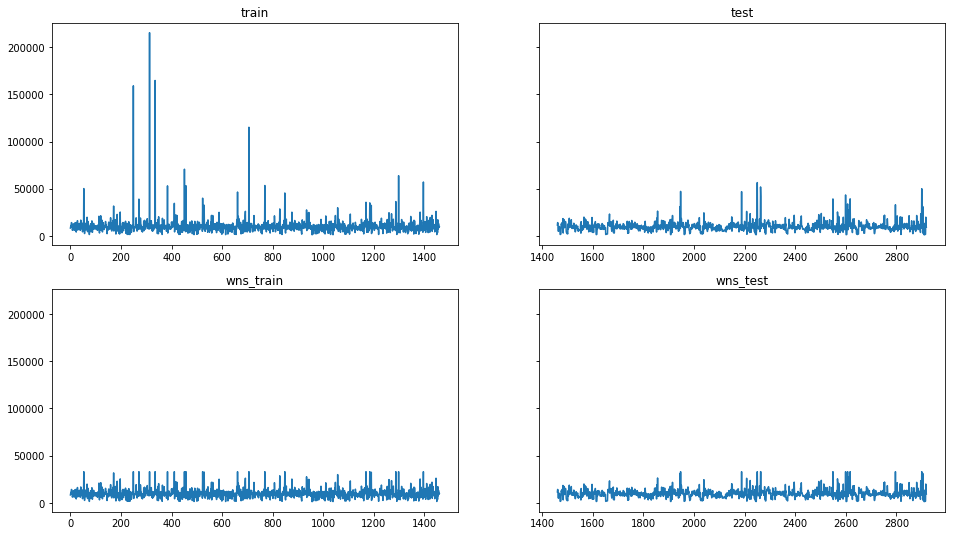

In [34]:
columns_to_clip['LotArea'] = 0.99
fig, axes = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(16, 9))

trn.LotArea.plot(ax=axes[0][0], title='train')
tst.LotArea.plot(ax=axes[0][1], title='test')
trn.LotArea.clip_upper(X_df.LotArea.quantile(columns_to_clip['LotArea'])).plot(ax=axes[1][0], title='wns_train')
tst.LotArea.clip_upper(X_df.LotArea.quantile(columns_to_clip['LotArea'])).plot(ax=axes[1][1], title='wns_test')

### Winsorizing GrLivArea

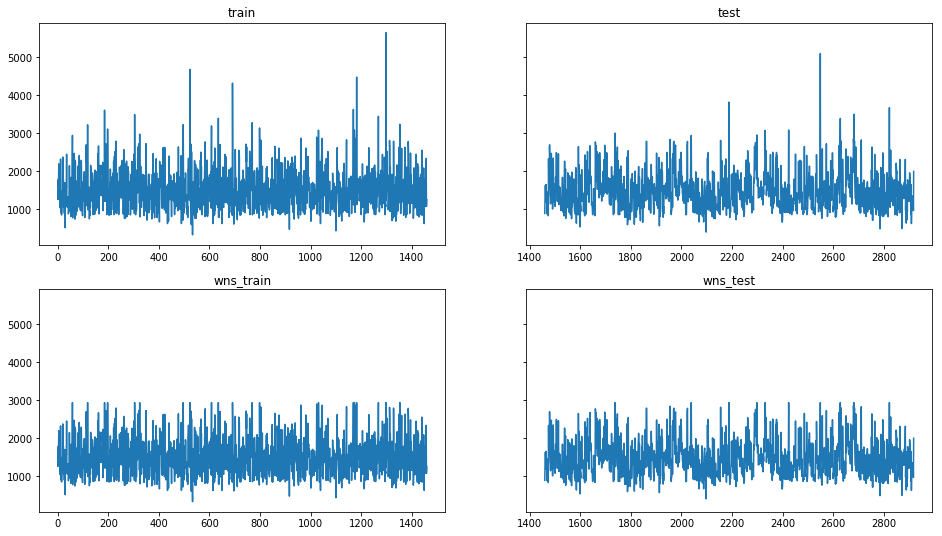

In [35]:
columns_to_clip['GrLivArea'] = 0.99
fig, axes = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(16, 9))

trn.GrLivArea.plot(ax=axes[0][0], title='train')
tst.GrLivArea.plot(ax=axes[0][1], title='test')
trn.GrLivArea.clip_upper(X_df.GrLivArea.quantile(columns_to_clip['GrLivArea'])).plot(ax=axes[1][0], title='wns_train')
tst.GrLivArea.clip_upper(X_df.GrLivArea.quantile(columns_to_clip['GrLivArea'])).plot(ax=axes[1][1], title='wns_test')

### Winsorizing TotalBsmtSF

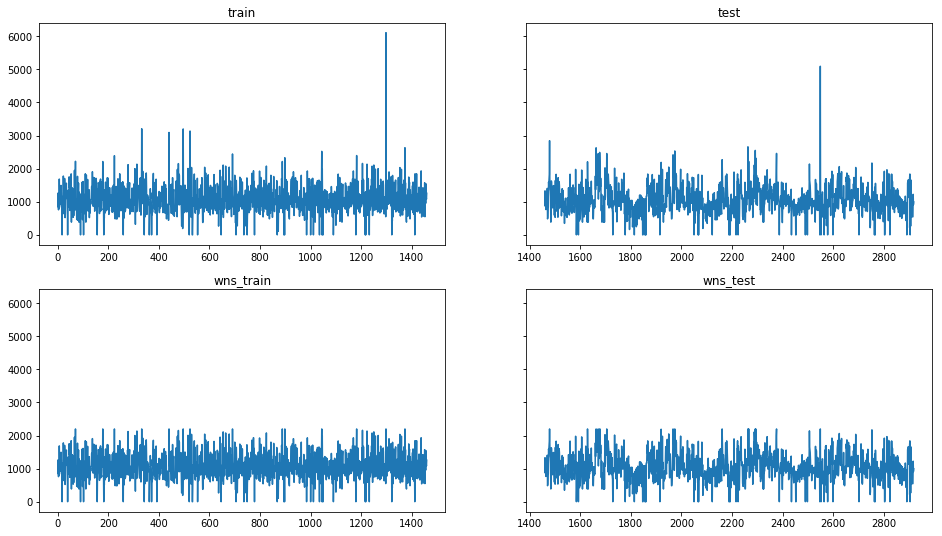

In [36]:
columns_to_clip['TotalBsmtSF'] = 0.99
fig, axes = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(16, 9))

trn.TotalBsmtSF.plot(ax=axes[0][0], title='train')
tst.TotalBsmtSF.plot(ax=axes[0][1], title='test')
trn.TotalBsmtSF.clip_upper(X_df.TotalBsmtSF.quantile(columns_to_clip['TotalBsmtSF'])).plot(ax=axes[1][0], title='wns_train')
tst.TotalBsmtSF.clip_upper(X_df.TotalBsmtSF.quantile(columns_to_clip['TotalBsmtSF'])).plot(ax=axes[1][1], title='wns_test')

### Winsorizing 1stFlrSF

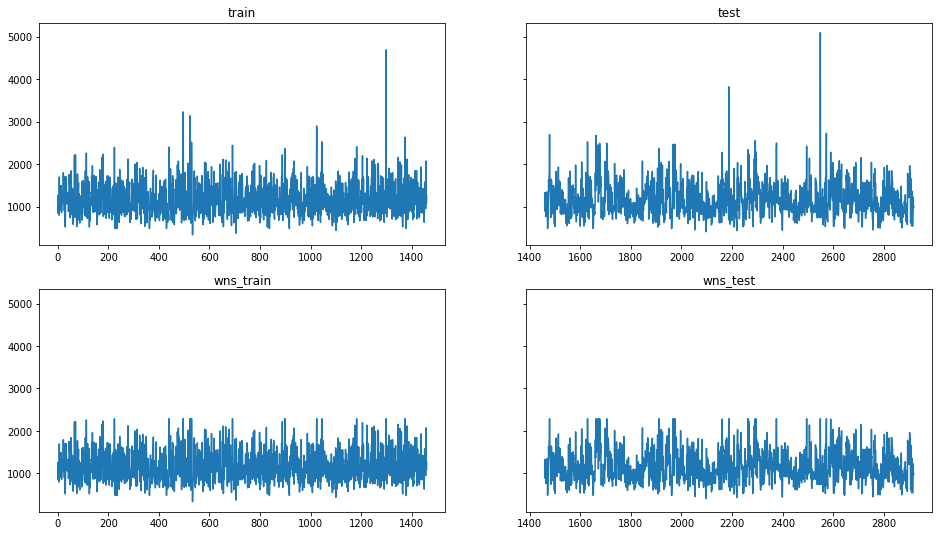

In [37]:
columns_to_clip['1stFlrSF'] = 0.99
fig, axes = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(16, 9))

trn['1stFlrSF'].plot(ax=axes[0][0], title='train')
tst['1stFlrSF'].plot(ax=axes[0][1], title='test')
trn['1stFlrSF'].clip_upper(X_df['1stFlrSF'].quantile(columns_to_clip['1stFlrSF'])).plot(ax=axes[1][0], title='wns_train')
tst['1stFlrSF'].clip_upper(X_df['1stFlrSF'].quantile(columns_to_clip['1stFlrSF'])).plot(ax=axes[1][1], title='wns_test')

### Winsorizing BsmtUnfSF

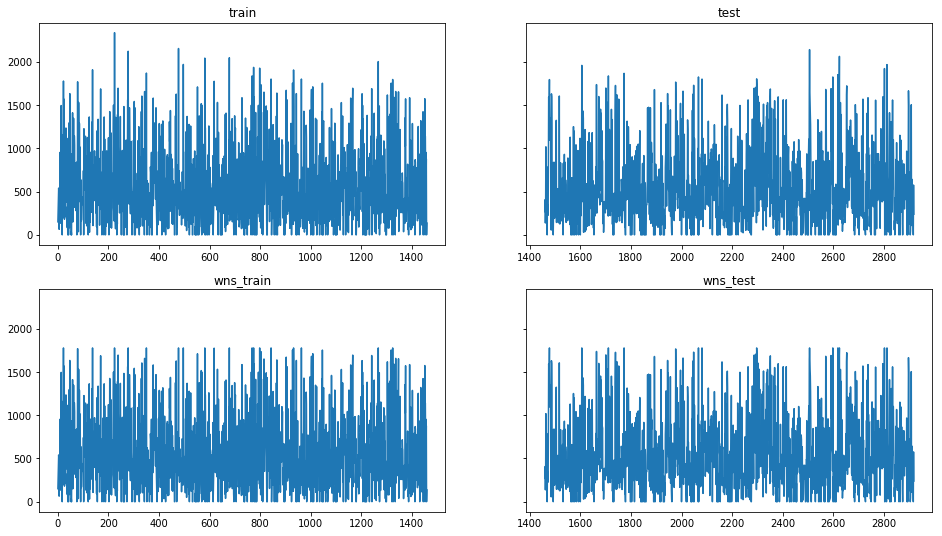

In [38]:
columns_to_clip['BsmtUnfSF'] = 0.99
fig, axes = plt.subplots(2, 2, sharex=False, sharey=True, figsize=(16, 9))

trn.BsmtUnfSF.plot(ax=axes[0][0], title='train')
tst.BsmtUnfSF.plot(ax=axes[0][1], title='test')
trn.BsmtUnfSF.clip_upper(X_df.BsmtUnfSF.quantile(columns_to_clip['BsmtUnfSF'])).plot(ax=axes[1][0], title='wns_train')
tst.BsmtUnfSF.clip_upper(X_df.BsmtUnfSF.quantile(columns_to_clip['BsmtUnfSF'])).plot(ax=axes[1][1], title='wns_test')

### Apply changes

In [39]:
for c, q in columns_to_clip.items():
    df_all[c].clip_upper(df_all[c].quantile(q))

In [40]:
X_df = df_all.drop('test', axis='columns')
Y_df = df_all.test

The OOB score has decreased.

In [433]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=10, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_df, Y_df)
m.oob_score_

0.49194929770469337

In [41]:
testing = X_df[len(df_known):].copy()
known = X_df[:len(df_known)].copy()
known['SalePrice'] = Y_known

### Random shuffle training and validation

This is not always guarenteed to work, because sometimes you are trying to predict recent samples, hence the validation set is better left as is.
I've tried it here because there seem to be no temporal predictors.

In [42]:
known = known.sample(frac=1).reset_index(drop=True)

In [83]:
X_df = known.drop('SalePrice', axis='columns')
Y_df = known.SalePrice

train_len = 1200
X_train, X_valid = split_vals(X_df, train_len)
Y_train, Y_valid = split_vals(Y_df, train_len)

# default starting index will be 1200
X_valid = X_valid.reset_index(drop=True)
Y_valid = Y_valid.reset_index(drop=True)

In [520]:
trees = 2000
rf = RandomForestRegressor(n_estimators=trees, n_jobs=-1, min_samples_leaf=3, oob_score=True, max_features=0.5)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 8.65 s


{'rmsle_train': 0.08283031614712429,
 'rmsle_valid': 0.13494864658444577,
 'score_train': 0.9566983887310209,
 'score_valid': 0.8701469970379849,
 'oob': 0.8570884819300495}

In [528]:
df_ext = known.copy()
df_ext['valid'] = 1
train_len = 1200
df_ext.valid[:train_len] = 0
X_df = df_ext.drop('valid', axis='columns')
Y_df = df_ext.valid

In [536]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=10, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_df, Y_df)
m.oob_score_

0.8212328767123288

In [537]:
fi = rf_feat_importance(m, X_df.columns); fi[:10]

,cols,imp
2,LotArea,0.070986
31,GarageArea,0.052235
18,GrLivArea,0.049050
15,1stFlrSF,0.048314
1,LotFrontage,0.047782
12,BsmtUnfSF,0.046329
285,SalePrice,0.040278
10,BsmtFinSF1,0.039729
29,GarageYrBlt,0.038078
33,OpenPorchSF,0.037307


## Overfitting :(
I've tried removing columns, but it seems like I'm stuck here :(

In [658]:
trees = 3000
rf = RandomForestRegressor(n_estimators=trees, n_jobs=-1, min_samples_leaf=2, oob_score=True, max_features=0.3)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 11.4 s


{'rmsle_train': 0.07147004892366983,
 'rmsle_valid': 0.1410585010658246,
 'score_train': 0.9712991660226913,
 'score_valid': 0.8913270929161303,
 'oob': 0.8690037275062834}

In [670]:
trees = 500
rf = ExtraTreesRegressor(n_estimators=trees, min_samples_leaf=2, max_features=0.5, n_jobs=-1)
%time rf.fit(X_train, Y_train)
print_score(rf)

Wall time: 2.58 s


{'rmsle_train': 0.03031813146158046,
 'rmsle_valid': 0.13782695141769954,
 'score_train': 0.995251428102078,
 'score_valid': 0.8956094700937818}

## Generating final predictions

In [671]:
predictions = pd.DataFrame()
predictions['Id'] = ids_test
predictions['SalePrice'] = rf.predict(testing)

In [672]:
predictions.to_csv('pred.csv', index=False)

## XGBoost

In [98]:
X_df = known.drop('SalePrice', axis='columns')
Y_df = known.SalePrice

train_len = 1000
X_train, X_valid = split_vals(X_df, train_len)
Y_train, Y_valid = split_vals(Y_df, train_len)

# default starting index will be 1200
X_valid = X_valid.reset_index(drop=True)
Y_valid = Y_valid.reset_index(drop=True)

X_valid, X_test = split_vals(X_valid, 200)
Y_valid, Y_test = split_vals(Y_valid, 200)

In [232]:
xgb_model = XGBRegressor(tree_method='hist',
                          n_jobs=3,
                          gamma=0.025,
                          n_estimators=2000,
                          max_depth=4,
                          learning_rate=0.04,
                          colsample_bylevel=0.5,
                          subsample=0.6,
                          objective='reg:linear')

In [233]:
xgb_model.fit(X_train, Y_train,
          eval_set=[(X_valid, Y_valid)],
          early_stopping_rounds=100,
          eval_metric='rmse')

[18:21:01] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[0]	validation_0-rmse:190783
Will train until validation_0-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:183726
[2]	validation_0-rmse:176971
[3]	validation_0-rmse:170247
[4]	validation_0-rmse:163792
[5]	validation_0-rmse:157610
[6]	validation_0-rmse:151659
[7]	validation_0-rmse:145888
[8]	validation_0-rmse:140586
[9]	validation_0-rmse:135436
[10]	validation_0-rmse:130673
[11]	validation_0-rmse:125813
[12]	validation_0-rmse:121372
[13]	validation_0-rmse:117035
[14]	validation_0-rmse:112464
[15]	validation_0-rmse:108466
[16]	validation_0-rmse:104820
[17]	validation_0-rmse:100968
[18]	validation_0-rmse:97442.7
[19]	validation_0-rmse:94160.3
[20]	validation_0-rmse:90850.1
[21]	validation_0-rmse:87767.5
[22]	validation_0-rmse:84685.2
[23]	validation_0-rmse:81684
[24]	validation_0-rmse:78778.7
[25]	validation_0-rmse:76093.2
[26]	validation_0-rmse:73422.7
[27]	validation_0-rmse:70983.

[257]	validation_0-rmse:19834
[258]	validation_0-rmse:19821
[259]	validation_0-rmse:19842
[260]	validation_0-rmse:19826.8
[261]	validation_0-rmse:19817.5
[262]	validation_0-rmse:19805.9
[263]	validation_0-rmse:19796
[264]	validation_0-rmse:19789.9
[265]	validation_0-rmse:19796
[266]	validation_0-rmse:19805.4
[267]	validation_0-rmse:19809.4
[268]	validation_0-rmse:19810.9
[269]	validation_0-rmse:19805.3
[270]	validation_0-rmse:19805.7
[271]	validation_0-rmse:19816.1
[272]	validation_0-rmse:19806.4
[273]	validation_0-rmse:19799.8
[274]	validation_0-rmse:19785.1
[275]	validation_0-rmse:19771.9
[276]	validation_0-rmse:19760.4
[277]	validation_0-rmse:19759.2
[278]	validation_0-rmse:19754.8
[279]	validation_0-rmse:19746.2
[280]	validation_0-rmse:19749.9
[281]	validation_0-rmse:19743.1
[282]	validation_0-rmse:19750
[283]	validation_0-rmse:19752.9
[284]	validation_0-rmse:19724.5
[285]	validation_0-rmse:19733.4
[286]	validation_0-rmse:19736.8
[287]	validation_0-rmse:19758.9
[288]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
       colsample_bytree=1, gamma=0.025, learning_rate=0.04,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=2000, n_jobs=3, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6, tree_method='hist')

In [239]:
y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_iteration)

In [240]:
print(rmsle(y_pred, Y_test))

0.13286153928397815


In [236]:
predictions = pd.DataFrame()
predictions['Id'] = ids_test
predictions['SalePrice'] = xgb_model.predict(testing)
predictions.to_csv('pred_xgb.csv', index=False)